In [196]:
# script to plot TTS for all UT segments 
# date created: 3/3/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [25]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/utbl_allseg_campavgbl_bltau_twp.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/mustar_allseg_campavgbl_bltau_twp.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/tau_allseg_campavgbl_bltau_twp.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/t_allseg_campavgbl_bltau_twp.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/gf_allseg_campavgbl_bltau_twp.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/segment_info_campavgbl_bltau_twp.pkl')
ratios_sort = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/ratios_sort_bltau_twp.pkl")
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/trcnames_allseg_twp_bltau.pkl")

In [30]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'] >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
ratios_sort_screened = ratios_sort[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [4]:
############ --------------- GET SEGMENT AVERAGE --------------- ###########

In [5]:
### GET INDEX FOR EACH TRACER IN COLUMN (NOT SAME FOR EVERY COLUMN)
# tracer names, full list 
names = trcnames_allseg[8].values

fill = np.empty(len(seg_info_screened))
fill[:] = np.nan

# thing to fill with index of each tracer in every column 
trc_idx = pd.DataFrame()
for nn in names:
    trc_idx[nn] = pd.Series(fill)
    
# loop through, get index location for every tracer 
col = list(trcnames_allseg_screened)
for nn in names:
    nnidx = []
    for i in col:
        idx = np.argwhere(trcnames_allseg_screened[i].values == nn)
        if (len(idx) > 0):
            nnidx.append(np.ndarray.item(idx))
        else: 
            nnidx.append(np.nan)
    trc_idx[nn] = nnidx 

In [6]:
### SIMPLE ONES 
# tau, use full list 
avg_tau = np.empty(52)
avg_tau[:] = np.nan
avg_tau = tau_allseg[8]

# get r2, tau 
avg_r2 = seg_info_screened['r squared'].mean()

In [7]:
### FIT, FIG A 
avg_utbl = np.empty(52)
avg_utbl[:] = np.nan

avg_mustar = np.empty(52)
avg_mustar[:] = np.nan

col = list(utbl_allseg_screened)

# loop through every tracer, get average 
for ii, nn in enumerate(names):
    indnan = trc_idx[nn].values 
    trc_utbl = []
    trc_mustar = []
    for i, idx in enumerate(col):
        tt = indnan[i]
        if (np.isfinite(tt) == True):
            trc_utbl.append(utbl_allseg_screened[idx].loc[int(tt)])
            trc_mustar.append(mustar_allseg_screened[idx].loc[int(tt)])
    avg_utbl[ii] = np.mean(trc_utbl)
    avg_mustar[ii] = np.mean(trc_mustar)
    

In [8]:
### GREENS FUNC, FIG B 
avg_gf = gf_allseg_screened.mean(axis = 1)
avg_t = t_allseg_screened.mean(axis = 1)

In [9]:
avg_mode_age = seg_info_screened['mode age'].mean()
avg_mean_age = seg_info_screened['mean age'].mean()

In [10]:
####################################################################################
####################################################################################
# choose rf05 segment 
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
#short10 = short10.reset_index()
#short10 = short10.drop(short10.columns[0], axis=1)

short = short10[short10['Flight'] == 'RF05']
short_idx = short.index
short10_idx = short10.index
short10

,Time_UTC,Flight,r squared,mean age,mode age
37,2014-01-29 03:49:44,RF07,0.784507,2.386737,0.539063
30,2014-01-29 00:53:09,RF07,0.745172,1.982815,0.539063
29,2014-01-29 00:49:20,RF07,0.675550,1.931381,0.539063
21,2014-01-25 01:06:11,RF06,0.695248,2.105795,0.539063
39,2014-01-29 04:04:41,RF07,0.712696,3.339008,0.789063
135,2014-02-19 19:48:48,RF13,0.752109,4.225354,1.039063
38,2014-01-29 03:53:02,RF07,0.836776,3.949039,1.039063
14,2014-01-22 04:33:40,RF05,0.774773,3.534931,1.039063
136,2014-02-19 19:54:49,RF13,0.774029,4.075299,1.039063
36,2014-01-29 02:50:26,RF07,0.846108,4.454914,1.289063


In [11]:
short10_rein = short10.reset_index()
short10_rein.drop(columns = 'index')

,Time_UTC,Flight,r squared,mean age,mode age
0,2014-01-29 03:49:44,RF07,0.784507,2.386737,0.539063
1,2014-01-29 00:53:09,RF07,0.745172,1.982815,0.539063
2,2014-01-29 00:49:20,RF07,0.675550,1.931381,0.539063
3,2014-01-25 01:06:11,RF06,0.695248,2.105795,0.539063
4,2014-01-29 04:04:41,RF07,0.712696,3.339008,0.789063
5,2014-02-19 19:48:48,RF13,0.752109,4.225354,1.039063
6,2014-01-29 03:53:02,RF07,0.836776,3.949039,1.039063
7,2014-01-22 04:33:40,RF05,0.774773,3.534931,1.039063
8,2014-02-19 19:54:49,RF13,0.774029,4.075299,1.039063
9,2014-01-29 02:50:26,RF07,0.846108,4.454914,1.289063


In [12]:
long10 = ascend_mode[-10:]
long10_rein = long10.reset_index()
long10_rein.drop(columns = 'index')

,Time_UTC,Flight,r squared,mean age,mode age
0,2014-02-19 18:24:47,RF13,0.946970,13.523965,3.539063
1,2014-02-17 04:02:17,RF12,0.886148,13.684965,3.539063
2,2014-02-22 01:51:44,RF14,0.936973,13.523965,3.539063
3,2014-02-22 01:42:44,RF14,0.945532,14.369213,3.789063
4,2014-02-22 00:37:11,RF14,0.944098,14.737654,3.789063
5,2014-02-19 18:48:47,RF13,0.945602,14.551102,3.789063
6,2014-02-17 04:05:43,RF12,0.930237,14.929052,4.039063
7,2014-02-22 01:24:44,RF14,0.926413,16.190663,4.289063
8,2014-02-13 05:57:37,RF11,0.880007,19.819604,5.289063
9,2014-02-13 05:26:12,RF11,0.865586,20.527447,5.539063


In [13]:
# which ones are enhanced?
#trcnames = trcnames_allseg[min_mode_loc]
#trcnames['ratios'] = min_utbl
#trcnames['lifetime'] = min_tau

In [14]:
###########################################################################################
###########################################################################################
###########################################################################################
# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

37
30
29
21
39
135
38
14


/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


136
36


(0, 1.5)

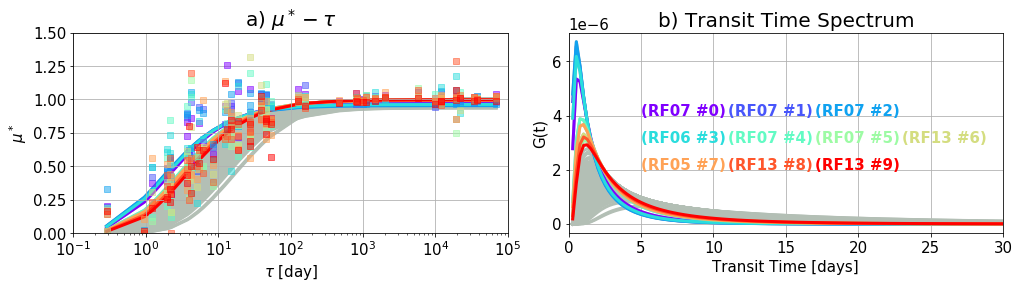

In [15]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

strings = ['(RF07 #0)', '(RF07 #1)', '(RF07 #2)', '(RF06 #3)', '(RF07 #4)',
          '(RF07 #5)', '(RF13 #6)', '(RF05 #7)', '(RF13 #8)', '(RF13 #9)']

for p, i in enumerate(short10.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = short10['r squared'].loc[i]
    mean_age = short10['mean age'].loc[i]
    mode_age = short10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    txt = strings[p]
    if (p < 3):
        plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    elif ((p > 2) & (p < 7)):
        plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    else:
        plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


121
107
161
160
153
125
109
158
85
84


(0, 1.5)

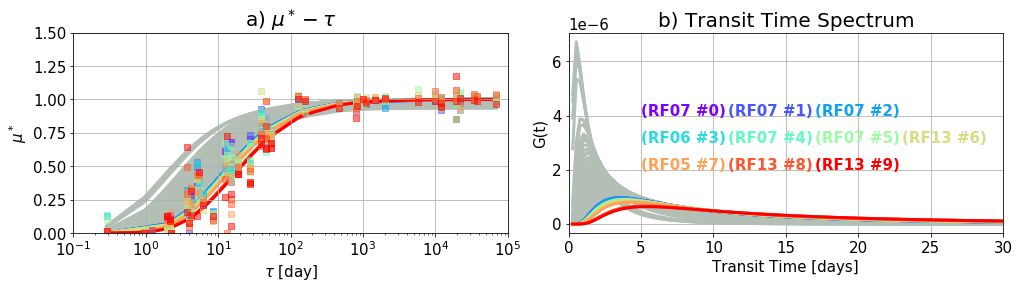

In [16]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

strings = ['(RF07 #0)', '(RF07 #1)', '(RF07 #2)', '(RF06 #3)', '(RF07 #4)',
          '(RF07 #5)', '(RF13 #6)', '(RF05 #7)', '(RF13 #8)', '(RF13 #9)']

for p, i in enumerate(long10.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = long10['r squared'].loc[i]
    mean_age = long10['mean age'].loc[i]
    mode_age = long10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    txt = strings[p]
    if (p < 3):
        plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    elif ((p > 2) & (p < 7)):
        plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    else:
        plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [17]:
###########################################################################################
###########################################################################################
###########################################################################################

37
30
29
39
38
36


(0, 1.5)

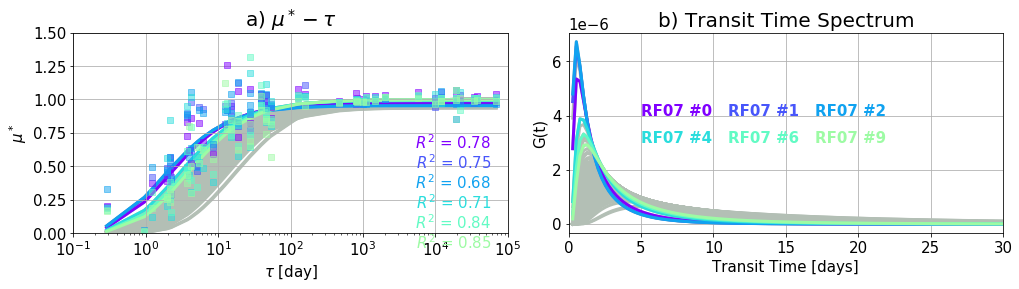

In [18]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

strings = ['RF07 #0', 'RF07 #1', 'RF07 #2', 'RF07 #4', 'RF07 #6', 'RF07 #9']
thisplot = short10.iloc[[0, 1, 2, 4, 6, 9], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = short10['r squared'].loc[i]
    mean_age = short10['mean age'].loc[i]
    mode_age = short10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 1
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1+p
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    txt = strings[p]
    if (p < 3):
        plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    elif ((p > 2) & (p < 7)):
        plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    else:
        plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


153


(0, 1.5)

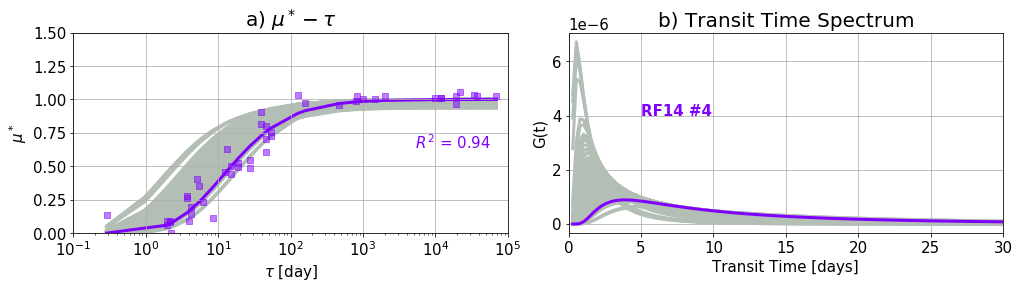

In [19]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

strings = ['RF14 #4']
thisplot = long10.iloc[[4], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = long10['r squared'].loc[i]
    mean_age = long10['mean age'].loc[i]
    mode_age = long10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 1
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1+p
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    txt = strings[p]
    if (p < 3):
        plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    elif ((p > 2) & (p < 7)):
        plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    else:
        plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [20]:
###########################################################################################
###########################################################################################
###########################################################################################

In [21]:
# plot average of a few points to reduce noise, RF07 
short10

,Time_UTC,Flight,r squared,mean age,mode age
37,2014-01-29 03:49:44,RF07,0.784507,2.386737,0.539063
30,2014-01-29 00:53:09,RF07,0.745172,1.982815,0.539063
29,2014-01-29 00:49:20,RF07,0.675550,1.931381,0.539063
21,2014-01-25 01:06:11,RF06,0.695248,2.105795,0.539063
39,2014-01-29 04:04:41,RF07,0.712696,3.339008,0.789063
135,2014-02-19 19:48:48,RF13,0.752109,4.225354,1.039063
38,2014-01-29 03:53:02,RF07,0.836776,3.949039,1.039063
14,2014-01-22 04:33:40,RF05,0.774773,3.534931,1.039063
136,2014-02-19 19:54:49,RF13,0.774029,4.075299,1.039063
36,2014-01-29 02:50:26,RF07,0.846108,4.454914,1.289063


In [32]:
toavg = [30, 29]

utbl = ratios_sort_screened[toavg].mean(axis = 1).values
utbl07 = utbl[~np.isnan(utbl)]
tau = tau_allseg_screened[toavg].mean(axis = 1).values
tau07 = tau[~np.isnan(tau)]


t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau07)
my_mustar_av, my_r2_av, my_gf_av, my_t_av, mean_age_av, mode_age_av, best_k_av = tts_mod.get_tts(utbl07, tau07, t, exp_decay_matrix, LT)

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

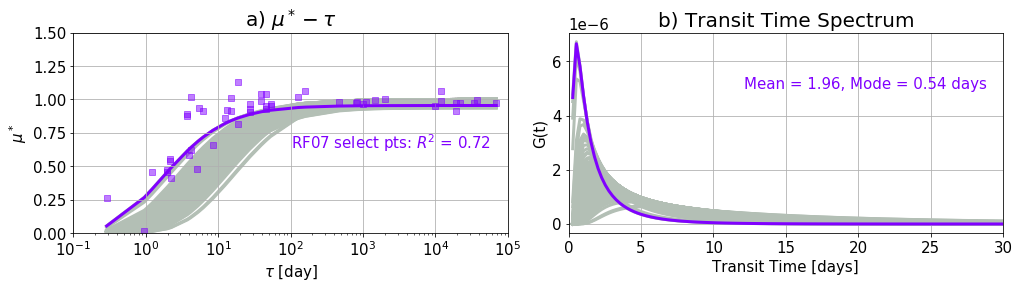

In [34]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
# plotting factors 
title_str = 'RF07 select pts: '
my_color = color[0]
add_r2 = 1
add_meanmode = 1
add_scatter = 1
#plot 
overplot = 1
tts_mod.plot_tts(tau07, my_mustar_av, utbl07, my_r2_av, 
                     my_gf_av, my_t_av, mean_age_av, mode_age_av, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)

# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [35]:
###########################################################################################
###########################################################################################
###########################################################################################
# all short RF07 points 
toavg = [37, 30, 29, 39, 38, 36]

utbl = ratios_sort_screened[toavg].mean(axis = 1).values
utbl07 = utbl[~np.isnan(utbl)]
tau = tau_allseg_screened[toavg].mean(axis = 1).values
tau07 = tau[~np.isnan(tau)]


t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau07)
my_mustar_av, my_r2_av, my_gf_av, my_t_av, mean_age_av, mode_age_av, best_k_av = tts_mod.get_tts(utbl07, tau07, t, exp_decay_matrix, LT)

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

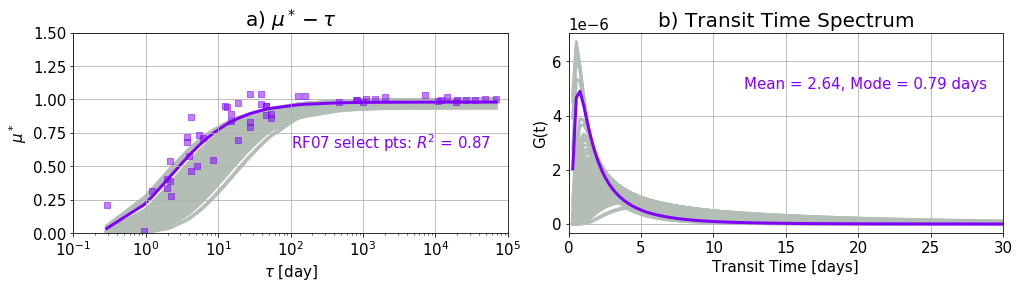

In [36]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
# plotting factors 
title_str = 'RF07 select pts: '
my_color = color[0]
add_r2 = 1
add_meanmode = 1
add_scatter = 1
#plot 
overplot = 1
tts_mod.plot_tts(tau07, my_mustar_av, utbl07, my_r2_av, 
                     my_gf_av, my_t_av, mean_age_av, mode_age_av, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)

# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])
